In [28]:
from pandas import read_csv
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df = read_csv('youtube_static.csv')
print df.shape

(10101, 29)


In [46]:
print "Average View Count:", np.mean(df['viewCount'])
temp = df[df['likeCount'] >= 0]
df['description'] = df['description'].apply(lambda x: len(str(x)))
print "Average LikeCount:", np.mean(df['likeCount'])
print "Average duration:", np.mean(df['duration'])
print "SD of LikeCount:", np.std(df['likeCount'])

Average View Count: 3146301.8796
Average LikeCount: 18997.1515222
Average duration: 806.002914921
SD of LikeCount: 105341.804584


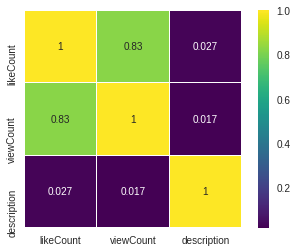

In [41]:
df = df[['likeCount', 'viewCount', 'description', 'dislikeCount']]
colormap = plt.cm.viridis
sns.heatmap(df.iloc[:,:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

{1.0: 3495479.0, 2.0: 187990.0, 10.0: 43149554.0, 43.0: 88447.0, 15.0: 53955.0, 17.0: 2200954.0, 19.0: 157731.0, 20.0: 3424268.0, 22.0: 5987068.0, 23.0: 8213913.0, 24.0: 11185897.0, 25.0: 402976.0, 26.0: 1552732.0, 27.0: 860838.0, 28.0: 674977.0, 29.0: 107490.0, 30.0: 474.0}


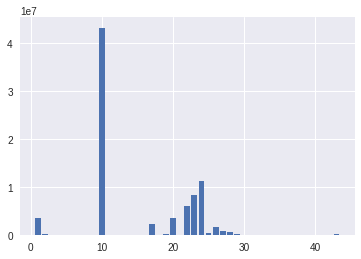

In [70]:
temp_df = df[['categoryId', 'likeCount']].dropna(axis=0)
category_count = dict()
for i in xrange(temp_df.shape[0]):
    if temp_df.iloc[i, 0] != 'hd' and temp_df.iloc[i, 0] != None:
        category_count[float(temp_df.iloc[i, 0])] = category_count.get(float(temp_df.iloc[i, 0]), 0) + temp_df.iloc[i, 1]
plt.bar(category_count.keys(), category_count.values())
print category_count